In [253]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

# the link given in the question was not opening so downloaded datset from kaggle and used below

iris= pd.read_csv("C:\iris.csv") #importing the dataset using pandas
iris.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

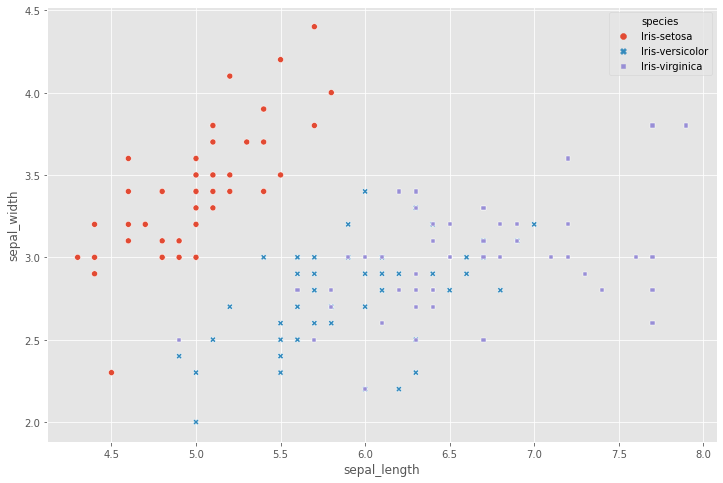

In [254]:
sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width, hue=iris.species, style=iris.species)

In [255]:
X=iris.iloc[ :, 0:4].values  # here we are separating the features(first four columns) from the target(the species column)


In [256]:
labelencoder = LabelEncoder()

iris['species'] = labelencoder.fit_transform(iris['species'])
iris

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [257]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)
X[:4]

array([[-1.72054204, -0.90068117,  1.03205722, -1.3412724 ],
       [-1.69744751, -1.14301691, -0.1249576 , -1.3412724 ],
       [-1.67435299, -1.38535265,  0.33784833, -1.39813811],
       [-1.65125846, -1.50652052,  0.10644536, -1.2844067 ]])

In [258]:
feat = X.T
covariance_matrix = np.cov(feat)
covariance_matrix[:4]

array([[ 1.00671141,  0.72148618, -0.40039813,  0.8886718 ],
       [ 0.72148618,  1.00671141, -0.11010327,  0.87760486],
       [-0.40039813, -0.11010327,  1.00671141, -0.42333835],
       [ 0.8886718 ,  0.87760486, -0.42333835,  1.00671141]])

In [259]:
eigen_values, eigen_vectors=np.linalg.eig(cov_matrix)  # each column of W is the Principal Component ie the orthogonal axis and ^ tells us how much we have to stretch along each axis
print("Eigen values \n", eigen_values, "\n")
print("Eigen vectors \n", eigen_vectors)

Eigen values 
 [2.83122907 0.04725055 0.22729518 0.92107083] 

Eigen vectors 
 [[ 0.55318314  0.31153594 -0.77256222 -0.00902118]
 [ 0.51774664  0.48025478  0.56930389 -0.42093567]
 [-0.28847469 -0.16889872 -0.2641027  -0.90471285]
 [ 0.58541369 -0.80235523  0.09638701 -0.06501105]]


In [260]:
eigen_vec, s, v= np.linalg.svd(X.T)
print("Eigen Vectors \n", eigen_vec)

Eigen Vectors 
 [[-0.55318314  0.00902118  0.77256222 -0.31153594]
 [-0.51774664  0.42093567 -0.56930389 -0.48025478]
 [ 0.28847469  0.90471285  0.2641027   0.16889872]
 [-0.58541369  0.06501105 -0.09638701  0.80235523]]


In [261]:
eigen_vectors.T

array([[ 0.55318314,  0.51774664, -0.28847469,  0.58541369],
       [ 0.31153594,  0.48025478, -0.16889872, -0.80235523],
       [-0.77256222,  0.56930389, -0.2641027 ,  0.09638701],
       [-0.00902118, -0.42093567, -0.90471285, -0.06501105]])

In [262]:

pc_1 = X.dot(eigen_vectors.T[0])
pc_2 = X.dot(eigen_vectors.T[1])
new_iris = pd.DataFrame(pc_1, columns=['PC1'])
new_iris['PC2'] = pc_2
new_iris['Y'] = iris['species']
new_iris.head()

,PC1,PC2,Y
0,-2.501021,-0.066703,0
1,-2.279945,0.019527,0
2,-2.559435,-0.122202,0
3,-2.476060,-0.225368,0
4,-2.579407,-0.135199,0


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

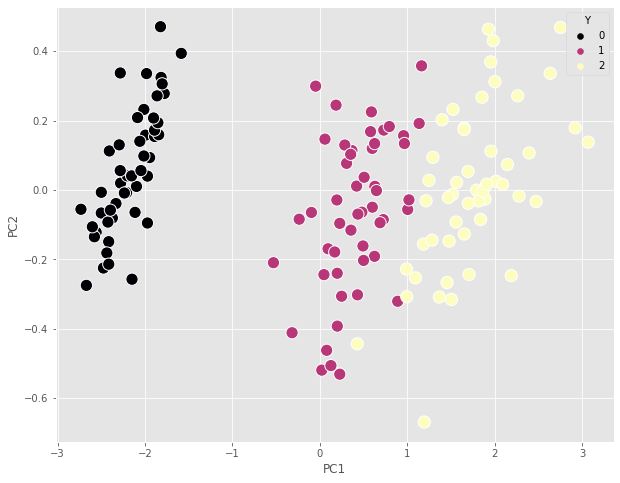

In [263]:
plt.figure(figsize=(10, 8))
sns.scatterplot(new_iris['PC1'],new_iris['PC2'] , hue=new_iris['Y'], s=150,palette='magma')

In [264]:
new_iris1=new_iris.iloc[:,0:2]

In [265]:
new_iris1

,PC1,PC2
0,-2.501021,-0.066703
1,-2.279945,0.019527
2,-2.559435,-0.122202
3,-2.476060,-0.225368
4,-2.579407,-0.135199
...,...,...
145,1.953963,0.369214
146,1.982991,0.430314
147,1.854045,0.267220
148,1.478182,-0.147747


In [266]:
from sklearn.cluster import SpectralClustering
spectral_model_n = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors',random_state=345)

In [267]:
l_n = spectral_model_n.fit_predict(new_iris1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [268]:
l_n

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [269]:
new_iris['output']=l_n.tolist()

new_iris

,PC1,PC2,Y,output
0,-2.501021,-0.066703,0,1
1,-2.279945,0.019527,0,1
2,-2.559435,-0.122202,0,1
3,-2.476060,-0.225368,0,1
4,-2.579407,-0.135199,0,1
...,...,...,...,...
145,1.953963,0.369214,2,0
146,1.982991,0.430314,2,0
147,1.854045,0.267220,2,0
148,1.478182,-0.147747,2,0


In [270]:
d=new_iris[new_iris['Y']==new_iris['output']]

acc_after=len(d)/len(new_iris)
print("accuracy of spectral clustring after the implementation of PCA: {}".format(acc_after*100))

accuracy of spectral clustring after the implementation of PCA: 0.6666666666666667


In [271]:
from sklearn.cluster import SpectralClustering
spectral_model_n = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors',random_state=345)
l_next = spectral_model_nn.fit_predict(X)

In [272]:
l_next

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [273]:
iris['output']=labels_next.tolist()

iris

,Id,sepal_length,sepal_width,petal_length,petal_width,species,output
0,1,5.1,3.5,1.4,0.2,0,1
1,2,4.9,3.0,1.4,0.2,0,1
2,3,4.7,3.2,1.3,0.2,0,1
3,4,4.6,3.1,1.5,0.2,0,1
4,5,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,0
146,147,6.3,2.5,5.0,1.9,2,0
147,148,6.5,3.0,5.2,2.0,2,0
148,149,6.2,3.4,5.4,2.3,2,0


In [274]:
b=iris[iris['species']==iris['output']]

acc_before=len(b)/len(iris)
print("accuracy of spectral clustring before the implementation of PCA: {}".format(acc_before*100))

accuracy of spectral clustring before the implementation of PCA: 3.3333333333333335


In [275]:
pc_k1 = X.dot(eigen_vectors.T[0])
iris_k1 = pd.DataFrame(pc_k1, columns=['PC1'])

arr_k1=iris_k1.values
arr_k1.shape
k_1=arr_k1.dot(eigen_vectors[0:1])
l2_k1=np.linalg.norm(X-k_1)
print("Reconstruction error for k=1: {}".format(l2_k1))

Reconstruction error for k=1: 21.071441245637235


In [276]:
pc1_k2 = X.dot(eigen_vectors.T[0])
pc2_k2 = X.dot(eigen_vectors.T[1])
df_k2 = pd.DataFrame(pc1_k2, columns=['PC1'])
df_k2['PC2'] = pc2_k2
arr_k2=df_k2.values
arr_k2.shape
k_2=arr_k2.dot(eigen_vectors[0:2])
l2_k2=np.linalg.norm(X-k_2)
print("Reconstruction error for k=2: {}".format(l2_k2))

Reconstruction error for k=2: 21.026780381251


In [277]:
pc1_k3 = X.dot(eigen_vectors.T[0])
pc2_k3 = X.dot(eigen_vectors.T[1])
pc3_k3 = X.dot(eigen_vectors.T[2])
df_k3 = pd.DataFrame(pc1_k3, columns=['PC1'])
df_k3['PC2'] = pc2_k3
df_k3['PC3'] = pc3_k3
arr_k3=df_k3.values
arr_k3.shape
k_3=arr_k3.dot(eigen_vectors[0:3])
l2_k3=np.linalg.norm(X-k_3)
print("Reconstruction error for k=3: {}".format(l2_k3))

Reconstruction error for k=3: 21.646986477147575
